In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel(r"D:\Personal_Python_Projects\Online Retail Dataset\Online Retail.xlsx")
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# Revenue By Country

In [3]:
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

country_revenue = country_revenue.sort_values(by='Revenue', ascending=False).reset_index()

country_revenue = country_revenue.drop(columns=['index'])

country_revenue

,Country,Revenue
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [4]:
country_revenue.dtypes #Debugging to solve issue with Revenue column being all NaN (It is fixed now but I left this as a note to myself)

Country     object
Revenue    float64
dtype: object

In [5]:
country_revenue['Country'] = country_revenue['Country'].astype('category')

In [6]:
country_revenue.dtypes

Country    category
Revenue     float64
dtype: object

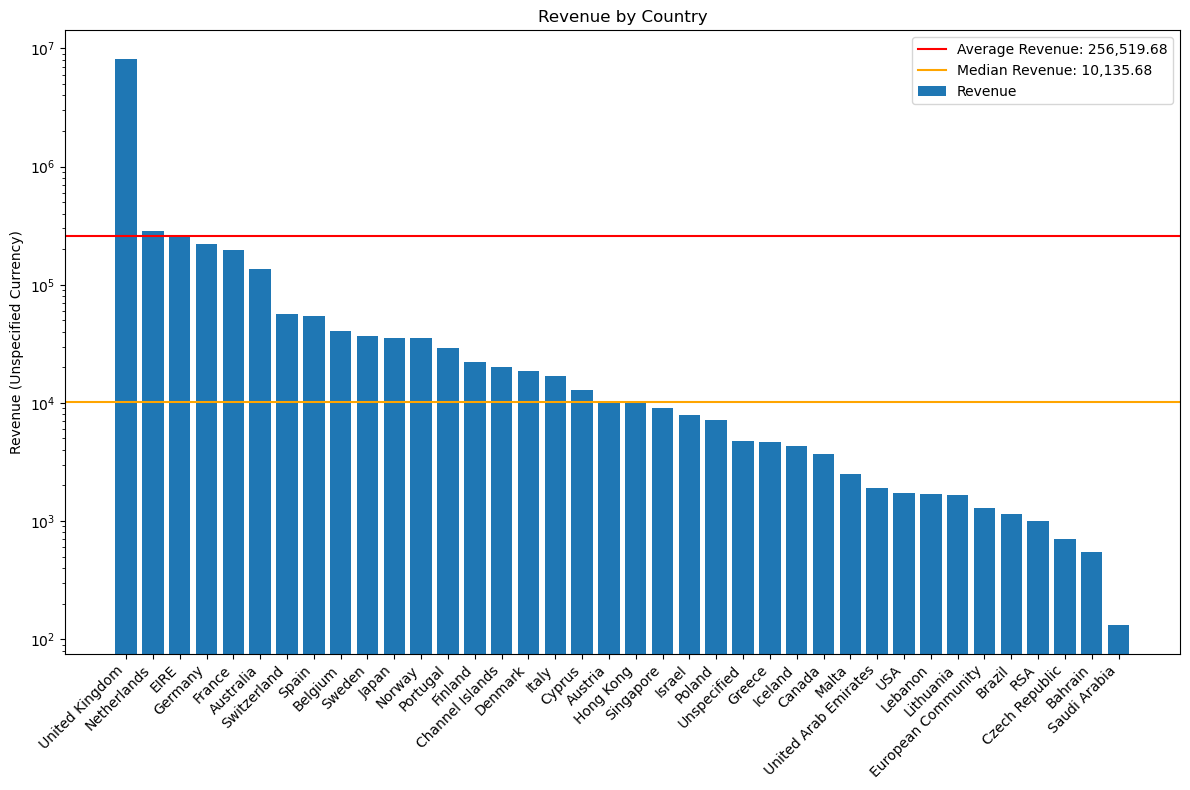

In [7]:
average_revenue = country_revenue['Revenue'].mean()
median_revenue = country_revenue['Revenue'].median()

plt.figure(figsize=(12, 8))
plt.bar(country_revenue['Country'], country_revenue['Revenue'], label='Revenue')

plt.axhline(y=average_revenue, color='red', linestyle='-', label=f'Average Revenue: {average_revenue:,.2f}')
plt.axhline(y=median_revenue, color='orange', linestyle='-', label=f'Median Revenue: {median_revenue:,.2f}')

plt.ylabel('Revenue (Unspecified Currency)')
plt.title('Revenue by Country')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

# Time Series and Forcasting

In [8]:
import matplotlib.dates as mdates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum().reset_index()

Text(0.5, 1.0, 'Daily Sales Trend')

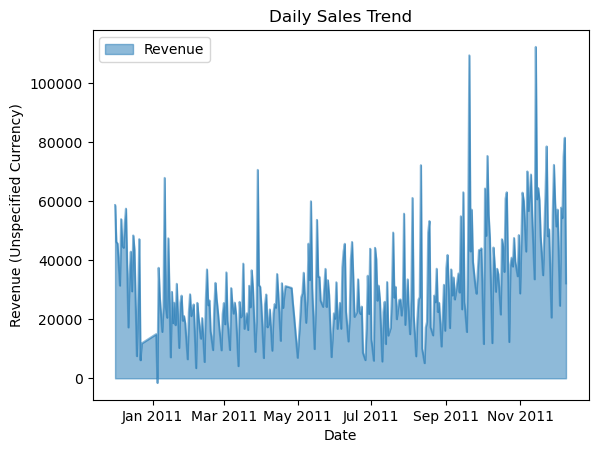

In [10]:
daily_sales.plot.area(x='InvoiceDate', y='Revenue', stacked=False)
plt.xlabel('Date')
plt.ylabel('Revenue (Unspecified Currency)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Daily Sales Trend')

In [11]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M').apply(lambda r: r.start_time))['Revenue'].sum().reset_index()
monthly_sales['Year'] = monthly_sales['InvoiceDate'].dt.year #Had to add the year since there are 2 Decembers
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales['YearMonth'] = monthly_sales['InvoiceDate'].dt.to_period('M')
monthly_sales2 = monthly_sales.drop(columns = ['InvoiceDate', 'Month', 'Year'], inplace = False) #False is the default value
monthly_sales2

,Revenue,YearMonth
0,748957.020,2010-12
1,560000.260,2011-01
2,498062.650,2011-02
3,683267.080,2011-03
4,493207.121,2011-04
5,723333.510,2011-05
6,691123.120,2011-06
7,681300.111,2011-07
8,682680.510,2011-08
9,1019687.622,2011-09


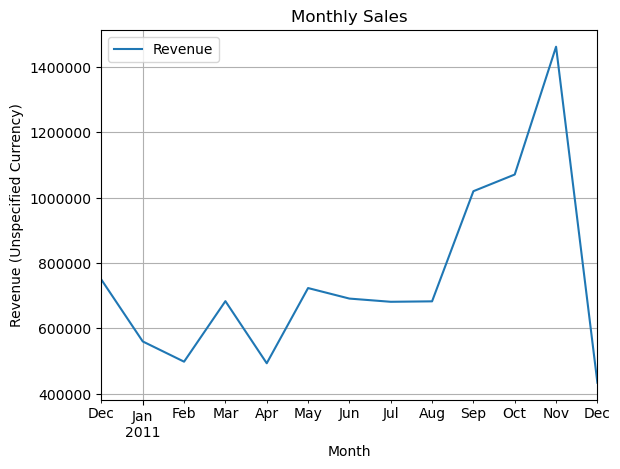

In [12]:
from matplotlib.ticker import ScalarFormatter
monthly_sales2.plot(x = 'YearMonth', y = 'Revenue')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Revenue (Unspecified Currency)')
plt.title('Monthly Sales')
plt.grid(True)

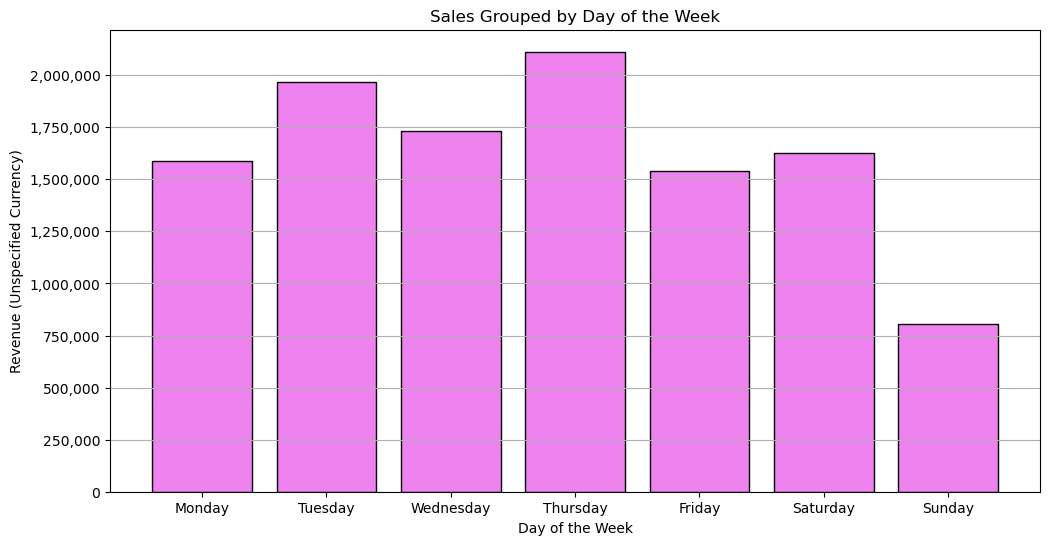

In [13]:
from matplotlib.ticker import FuncFormatter

weekly_sales = df.groupby(df['InvoiceDate'].dt.day_name())['Revenue'].sum()

weekly_sales = weekly_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

average_revenue = weekly_sales.dropna().mean()

weekly_sales = weekly_sales.fillna(average_revenue).reset_index() #Gave this since Saturday was showing as NaN, not sure if
#there is actually no sales on Saturday or if I just messed something up
weekly_sales.columns = ['Day', 'Revenue']

def add_comma(value, tick_number):  #For readability on y axis
    return f'{int(value):,}'

plt.figure(figsize=(12, 6))
plt.bar(weekly_sales['Day'], weekly_sales['Revenue'], color='violet', edgecolor = 'black')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue (Unspecified Currency)')
plt.title('Sales Grouped by Day of the Week')
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(add_comma))
plt.show()

C:\ArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


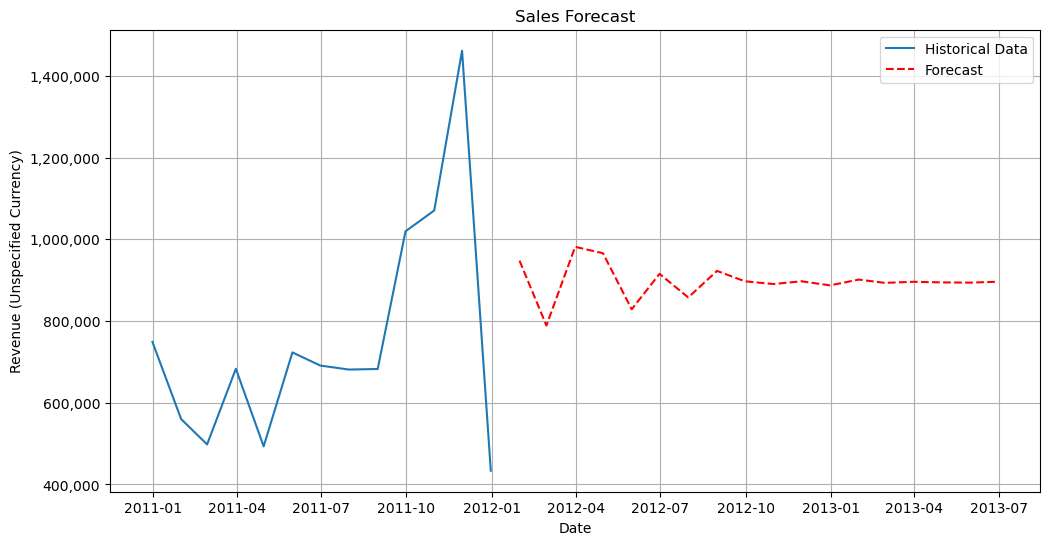

In [15]:
from statsmodels.tsa.arima.model import ARIMA

ts_data = monthly_sales.set_index('InvoiceDate')['Revenue']
ts_data.index = pd.date_range(start=ts_data.index[0], periods=len(ts_data), freq='M')

model = ARIMA(ts_data, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=18)  #Forecast next 18 months

def add_comma(value, tick_number):  #For readability on y axis
    return f'{int(value):,}'

plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Historical Data')
plt.plot(pd.date_range(start=ts_data.index[-1], periods=19, freq='M')[1:], forecast, color='red', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue (Unspecified Currency)')
plt.title('Sales Forecast')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(add_comma))
plt.show()

# Market Basket Analysis

In [21]:
#Combine items in a row based on InvoiceNo
grouped = df.groupby('InvoiceNo')['Description'].apply(list).reset_index()
grouped

,InvoiceNo,Description
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]
...,...,...
25895,C581484,"[PAPER CRAFT , LITTLE BIRDIE]"
25896,C581490,"[VICTORIAN GLASS HANGING T-LIGHT, ZINC T-LIGHT..."
25897,C581499,[Manual]
25898,C581568,[VICTORIAN SEWING BOX LARGE]


In [56]:
#Create list of lists (the lists are the combined invoices)
transactions = grouped['Description'].apply(lambda x: [str(i) for i in x if isinstance(i, str)]).tolist() #Fix issue with there being float values

In [26]:
from mlxtend.preprocessing import TransactionEncoder
#Convert to True/False values
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

transaction_df

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [31]:
sorted_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_itemsets
#Support means how frequent the item appears, so for example the first item appears in 8.88% of orders

,support,itemsets
561,0.088880,(WHITE HANGING HEART T-LIGHT HOLDER)
401,0.083745,(REGENCY CAKESTAND 3 TIER)
238,0.082432,(JUMBO BAG RED RETROSPOT)
328,0.065869,(PARTY BUNTING)
274,0.062046,(LUNCH BAG RED RETROSPOT)
...,...,...
214,0.010000,(ICE CREAM PEN LIP GLOSS )
6,0.010000,(12 PENCILS TALL TUBE SKULLS)
938,0.010000,"(WHITE HANGING HEART T-LIGHT HOLDER, ROSES REG..."
252,0.010000,(KINGS CHOICE TEA CADDY )


In [29]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.032278,0.051506,0.017683,0.547847,10.636608,0.016021,2.097728,0.936204
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.017027,0.038649,0.010734,0.630385,16.310673,0.010076,2.600957,0.954950
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.017027,0.041737,0.011429,0.671202,16.081524,0.010718,2.914440,0.954062
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.022510,0.038649,0.012973,0.576329,14.912018,0.012103,2.269101,0.954424
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.017838,0.038649,0.010695,0.599567,15.513275,0.010006,2.400780,0.952530
...,...,...,...,...,...,...,...,...,...,...
351,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD...",(JUMBO SHOPPER VINTAGE RED PAISLEY),0.016062,0.045830,0.010386,0.646635,14.109382,0.009650,2.700236,0.944292
352,"(JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...",(JUMBO BAG PINK POLKADOT),0.015097,0.047529,0.010386,0.687980,14.474955,0.009669,3.052592,0.945184
353,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...","(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",0.018224,0.028301,0.010386,0.569915,20.137524,0.009870,2.259319,0.967982
354,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)","(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.020000,0.026371,0.010386,0.519305,19.692533,0.009859,2.025462,0.968591


In [48]:
#Need to convert these from tuples
rules['antecedents'] = rules['antecedents'].apply(set)
rules['consequents'] = rules['consequents'].apply(set)

In [55]:
def recommend_items(in_cart, rules, top_n=3):
    recommendations = []

    def matches(purchased_items, antecedents):
        if isinstance(antecedents, set):
            return antecedents.intersection(purchased_items)
        return set()

    relevant_rules = rules[rules['antecedents'].apply(lambda x: bool(matches(in_cart, x)))]
    
    relevant_rules = relevant_rules.sort_values(by=['lift', 'confidence', 'conviction'], ascending=False)
    
    for _, rule in relevant_rules.iterrows():
        recommendations.extend(rule['consequents'] - in_cart)
    
    recommended_items = pd.Series(recommendations).value_counts().head(top_n).index.tolist()
    return recommended_items

#Example purchased item, some items don't geneate a recommendation though. Not sure if I did something wrong or if it just is a part of this data set for that to happen
in_cart = frozenset(['ALARM CLOCK BAKELIKE IVORY']) #Frozenset makes it immutable so it can be hashable
recommended_items = recommend_items(in_cart, rules)
print(f"Recommended items: {recommended_items}")


Recommended items: ['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN']


# Random Analysis

In [107]:
corr = df.corr(numeric_only = True)
for i in range (corr.shape[0]):
    corr.iloc[i, i] = None
corr

,Quantity,UnitPrice,CustomerID,Revenue
Quantity,NaN,-0.001235,-0.003600,0.886681
UnitPrice,-0.001235,NaN,-0.004560,-0.162029
CustomerID,-0.003600,-0.004560,NaN,-0.002274
Revenue,0.886681,-0.162029,-0.002274,NaN


<AxesSubplot: >

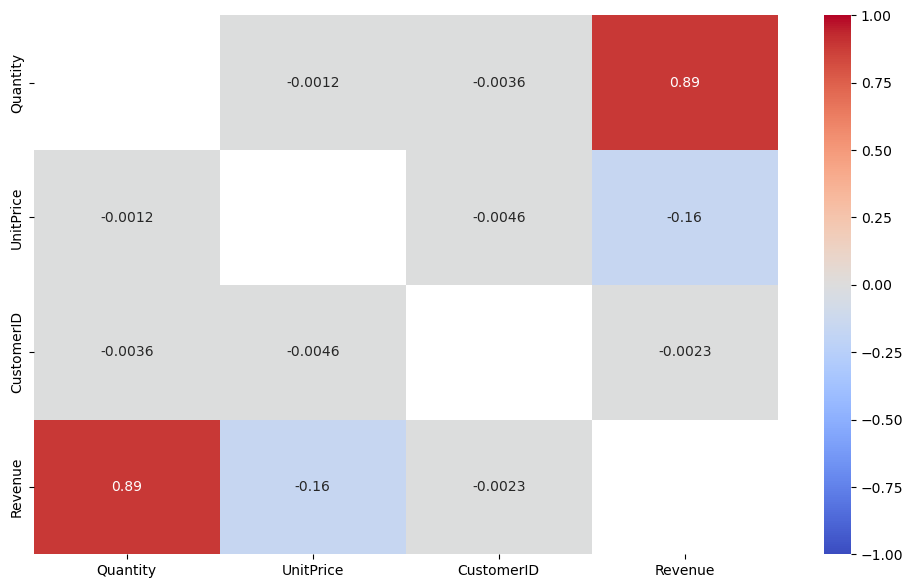

In [110]:
import seaborn as sns

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap = 'coolwarm')

In [16]:
df2 = df.set_index('InvoiceNo')
df2.transpose().sort_index()

InvoiceNo,536365,536365,536365,536365,536365,536365,536365,536366,536366,536367,...,581587,581587,581587,581587,581587,581587,581587,581587,581587,581587
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,...,France,France,France,France,France,France,France,France,France,France
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,13047.0,...,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,...,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,CHILDRENS APRON SPACEBOY DESIGN,SPACEBOY LUNCH BOX,CHILDRENS CUTLERY SPACEBOY,PACK OF 20 SPACEBOY NAPKINS,CHILDREN'S APRON DOLLY GIRL,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY CIRCUS PARADE,BAKING SET 9 PIECE RETROSPOT
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:28:00,2010-12-01 08:28:00,2010-12-01 08:34:00,...,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00
Quantity,6,6,8,6,6,2,6,6,6,32,...,4,4,8,12,4,12,6,4,4,3
Revenue,15.3,20.34,22.0,20.34,20.34,15.3,25.5,11.1,11.1,54.08,...,15.0,15.0,15.6,23.4,16.6,10.2,12.6,16.6,16.6,14.85
StockCode,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,22726,22730,22367,22629,23256,22613,22899,23254,23255,22138
UnitPrice,2.55,3.39,2.75,3.39,3.39,7.65,4.25,1.85,1.85,1.69,...,3.75,3.75,1.95,1.95,4.15,0.85,2.1,4.15,4.15,4.95
